In [1]:
import gaussxw
import math
import pylab as py
import numpy as np
import romberg as rm

%matplotlib inline

In [2]:
def hermitePolynomial (nValue, xValue):
    """
    Description: Calculates the nth Hermite polynomial for the given n-value at the given x-value
    
    Parameters: nValue - the nth Hermite polynomial to be calculated
                xValue - the independant variable where the Hermite polynomial will be determined
    
    Return: The value of the nth Hermite polynomial at the given x-value
    """
    
    hermiteCur = 0
    hermiteNext = 1
  
    for i in range (nValue):
        hermiteCur, hermiteNext = hermiteNext, 2 * xValue * hermiteNext -  2 * i * hermiteCur
    
    return hermiteNext
    

In [3]:
def quantumWaveFunc (nValue, xValue):
    """
    Description: Calculates the wavefunction of the nth energy level of the one-dimensional quantum harmonic oscillator
    
    Parameters: nValue - the energy level being calculated
                xValue - the independant variable where the wavefunction is being evaluated
    
    Return: The value of the wavefunction for the nth energy level evaluated at the given x-value
    """
    
    return math.exp (-xValue**2 / 2) / (math.sqrt (2**nValue * math.factorial (nValue) * math.sqrt (math.pi))) * hermitePolynomial (nValue, xValue)

In [24]:
figureSize = (10, 8)
labelFontSize = 20

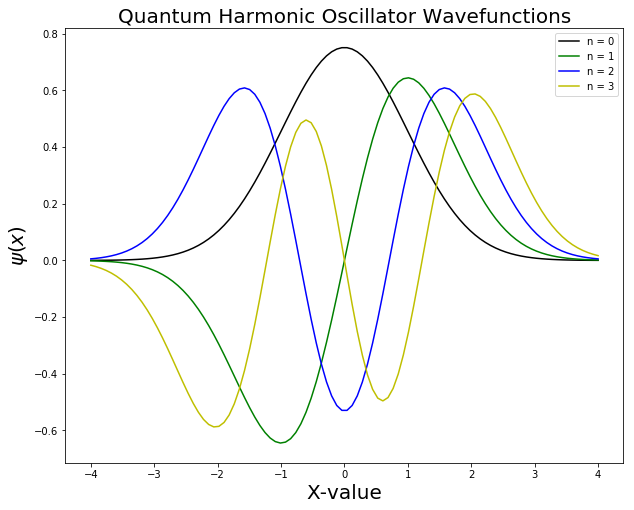

In [25]:
xLabel = "X-value"
yLabel = r"$\psi (x)$"
title = "Quantum Harmonic Oscillator Wavefunctions"

numberOfDataPoints = 100
nValues = [0, 1, 2, 3]
x1 = -4
x2 =  4

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([len (nValues), numberOfDataPoints])

for i in range (len (nValues)):
    for j in range (len (xValues)):
        yValues[i][j] = quantumWaveFunc (nValues[i], xValues[j])

py.figure (figsize = figureSize)
py.xlabel (xLabel, fontsize = labelFontSize)
py.ylabel (yLabel, fontsize = labelFontSize)
py.title (title, fontsize = labelFontSize)
py.plot (xValues, yValues[0], 'k-', label = "n = 0")
py.plot (xValues, yValues[1], 'g-', label = "n = 1")
py.plot (xValues, yValues[2], 'b-', label = "n = 2")
py.plot (xValues, yValues[3], 'y-', label = "n = 3")


py.legend ()
py.show ()

This plot shows the first four wave functions for a quantum harmonic oscilator.

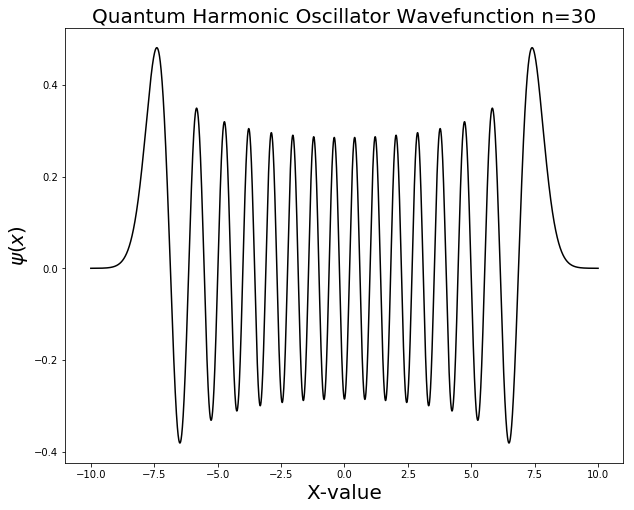

In [6]:
numberOfDataPoints = 10000

title = "Quantum Harmonic Oscillator Wavefunction n=30"

nValue = 30
x1 = -10
x2 =  10

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([numberOfDataPoints])

for j in range (len (xValues)):
    yValues[j] = quantumWaveFunc (nValue, xValues[j])

py.figure (figsize = figureSize)
py.xlabel (xLabel, fontsize = labelFontSize)
py.ylabel (yLabel, fontsize = labelFontSize)
py.title (title, fontsize = labelFontSize)
py.plot (xValues, yValues, 'k-')


py.legend ()
py.show ()

In [4]:
def rootMeanFunc (nValue, xValue):
    """
    Description: returns the integrand of the square of the root-mean-squared for a 
                    quantum wave function integration
    
    Parameters: nValue - nth value of the wave function
                xValue - independant variable at which this function is being evaluated
    
    Return:the integrand of the square of the root-mean-squared for a quantum wave function
    """
    return xValue**2 * (abs (quantumWaveFunc (nValue, xValue)))**2

def rootMeanSquaredFunc (numSamplePoints, nValue, x1, x2):
    """
    Description: returns the root-mean-squared of a wave function integration
    
    Parameters: numSamplePoints - number of sample points to evaluate the error, 
                                    larger values determine more accurate approximations
                nValue - nth value of the wave function
                x1 - left hand value of domain 
                x2 - right hand value of domain
    
    Return: the root-mean-squared of a wave function integration
    """
    integral = 0
    
    x, w = gaussxw.gaussxw (numSamplePoints)

    xp = 0.5 * (x2 - x1) * x + 0.5 * (x2 + x1)
    wp = 0.5 * (x2 - x1) * w

    for i in range (numSamplePoints):
        integral += wp[i] * rootMeanFunc (nValue, math.tan (xp[i])) / (math.cos (xp[i]))**2

    integral = math.sqrt (integral)
    
    return integral

In [8]:
numSamplePoints = 100
x1 = -math.pi / 2
x2 = math.pi / 2
nValue = 5

print ("Quantum Uncertainty for n =", nValue, "case:", rootMeanSquaredFunc (numSamplePoints, nValue, x1, x2))

Quantum Uncertainty for n = 5 case: 2.3452078797796547


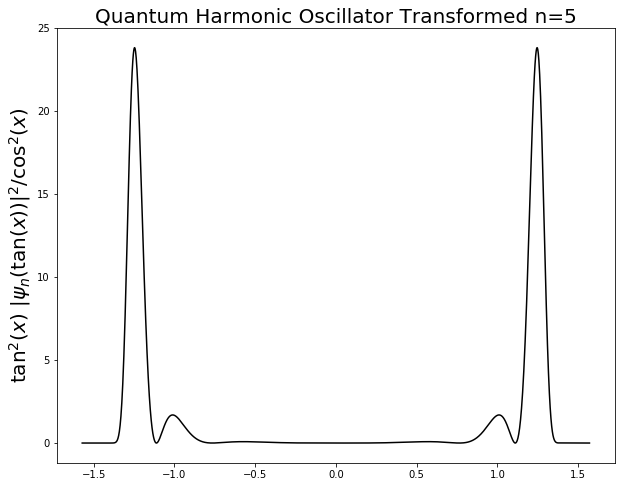

In [53]:
xLabel = ""
yLabel = r"$\tan^2(x) \ | \psi_n (\tan (x)) |^2 / \cos^2(x)$"
title = "Quantum Harmonic Oscillator Transformed n=5"

numberOfDataPoints = 10000
nValue = 5
x1 = -math.pi / 2
x2 =  math.pi / 2

x, w = gaussxw.gaussxw (numberOfDataPoints)

xp = 0.5 * (x2 - x1) * x + 0.5 * (x2 + x1)
wp = 0.5 * (x2 - x1) * w

yValues = []

for xValue in xp:
    yValues.append (rootMeanFunc (nValue, math.tan (xValue)) / (math.cos (xValue))**2)

ure (figsize = figureSize)
py.xlabel (xLabel, fontsize = labelFontSize)
py.ylabel (yLabel, fontsize = labelFontSize)
py.title (title, fontsize = labelFontSize)
py.plot (xp, yValues, 'k-')


py.legend ()
py.show ()

This could be problamatic because of the steapness of the curve in regions
$\sqrt{\av{x^2}}$, where

\begin{displaymath}

$\av{x^2} = \int_{-\infty}^\infty x^2 |\psi_n(x)|^2 \>\dd x.$

\end{displaymath}

Write a program that evaluates this integral using Romberg integration and then calculates the uncertainty (i.e., the root-mean-square position of the particle) for a given value of $n$. Use your program to calculate the integral and uncertainty for $n=0$, $1$, ... , $5$. See if you can spot the pattern!


In [5]:
def rombergQuantumWaveFunc (waveFunc, nValue, x1, x2, tolerance):
    """
    Description: returns the integral of the given wave function using the Romberg 
                    approximation technique, and the root-mean-squared value of this 
                    integration
    
    Parameters: waveFunc - wave function being evaluated
                nValue - nth value of the wave function
                x1 - left hand side of domain
                x2 - right hand side of domain
    
    Return: the integral of the given wave function and the root-mean-squared error of
                this integration
    """
    integral = 0
    errorSamplePoints = 100
    
    def waveFuncSetN (xValue):
        return waveFunc (nValue, xValue)
    
    def rootMeanSetN (xValue):
        return rootMeanFunc (nValue, xValue)
    
    integral = rm.romberg (waveFuncSetN, (x1, x2), tolerance)
    rootMeanSquared = rootMeanSquaredFunc (errorSamplePoints, nValue, x1, x2)

    return integral, rootMeanSquared

In [20]:
x1 = -4
x2 = 4
tolerance = 1e-10
nValues = [0, 1, 2, 3, 4, 5]

for n in nValues:
    integral, error = rombergQuantumWaveFunc (quantumWaveFunc, n, x1, x2, tolerance)
    print ("n:{} Integral: {:f} Root-Mean-Squared: {:f}".format (n, integral, error))


n:0 Integral: 1.882673 Root-Mean-Squared: 1.130642
n:1 Integral: 0.000000 Root-Mean-Squared: 1.837973
n:2 Integral: 1.328400 Root-Mean-Squared: 2.256651
n:3 Integral: 0.000000 Root-Mean-Squared: 2.655876
n:4 Integral: 1.126563 Root-Mean-Squared: 2.961995
n:5 Integral: 0.000000 Root-Mean-Squared: 3.288795
